In [2]:
import geopandas as gpd
import pandas as pd
from pyproj import CRS
from shapely.geometry import Point

In [3]:
# tartu communities
fp = r'data/Communities_Tartu.shp'
geodata_tartu = gpd.read_file(fp)

geodata_tartu.head()

,OBJECTI,KANT_nk,knt_ppS,KOOD,VID,NIMI,asst_pS,geometry
0,2.0,Aardla Tartu,1087,1696,41130677.0,Haaslava küla,378,"POLYGON ((665255.010 6470160.490, 665265.980 6..."
1,13.0,Ahunapalu Tartu,34,1125,41129654.0,Ahunapalu küla,18,"POLYGON ((690268.688 6478614.609, 690270.495 6..."
2,17.0,Alatskivi Tartu,895,1181,41130722.0,Alatskivi alevik,384,"POLYGON ((684373.120 6503482.510, 684429.490 6..."
3,25.0,Annikoru Tartu,571,1291,41130549.0,Annikoru küla,326,"POLYGON ((636967.540 6465277.360, 636959.400 6..."
4,49.0,Elva linn,6089,1586,41131183.0,Elva linn,5650,"POLYGON ((640225.690 6456082.230, 640220.780 6..."


65


'WGS 84'

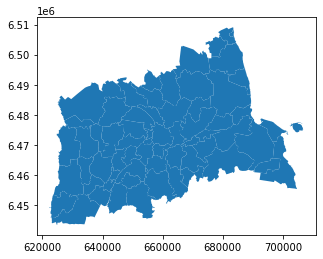

In [4]:
print(len(geodata_tartu))
geodata_tartu.plot()

# projecting to wgs84
geodata_tartu = geodata_tartu.to_crs(4326)
geodata_tartu.crs.name

In [76]:
# list with tartu communities for subset 
tartu_communities = geodata_tartu['KANT_nk'].to_list()

In [77]:
# reading movement OD data
fp = r'data/OD_matrix_201708.csv'
movements = gpd.read_file(fp, encoding='Latin')

movements.head()

,KANT_start,KANT_end,start_kant_id,end_kant_id,X_start,Y_start,X_end,Y_end,route_id,Population,RegularMovers,geometry
0,Aakre Valga,Aakre Valga,1,1,627213.008798677,6440209.31365088,627213.008798677,6440209.31365088,1697,470,86,None
1,Aakre Valga,Annikoru Tartu,1,25,627213.008798677,6440209.31365088,634298.193716758,6461855.93781216,21178,470,1,None
2,Aakre Valga,Elva linn,1,49,627213.008798677,6440209.31365088,642136.014360787,6456562.83692973,41506,470,13,None
3,Aakre Valga,Elva ümbruse kant Tartu,1,50,627213.008798677,6440209.31365088,639265.501559962,6453031.6043608,42353,470,2,None
4,Aakre Valga,Hellenurme Valga,1,81,627213.008798677,6440209.31365088,640178.641901282,6447022.34053979,68610,470,1,None


In [78]:
# selecting all origins from Tartu County
origins = movements[movements['KANT_start'].isin(tartu_communities)]

In [79]:
# selecting all destination from Tartu County origins
movements_tartu =  origins[origins['KANT_end'].isin(tartu_communities)]

In [80]:
# create a geometry column of ORIGIN
movements_tartu = movements_tartu.copy()

xorigins = movements_tartu['X_start'].to_list()
yorigins = movements_tartu['Y_start'].to_list()

movements_tartu['geometry'] = [Point(float(xcoor), float(ycoor)) for xcoor, ycoor in zip(xorigins, yorigins)]

movements_tartu.head()

,KANT_start,KANT_end,start_kant_id,end_kant_id,X_start,Y_start,X_end,Y_end,route_id,Population,RegularMovers,geometry
55,Aardla Tartu,Aardla Tartu,2,2,664206.080559745,6466176.45353372,664206.080559745,6466176.45353372,2545,1087,319,POINT (664206.081 6466176.454)
56,Aardla Tartu,Elva linn,2,49,664206.080559745,6466176.45353372,642136.014360787,6456562.83692973,41507,1087,1,POINT (664206.081 6466176.454)
59,Aardla Tartu,Haage Tartu,2,58,664206.080559745,6466176.45353372,649045.332982645,6470852.0148829,49130,1087,3,POINT (664206.081 6466176.454)
60,Aardla Tartu,Ignase Tartu,2,93,664206.080559745,6466176.45353372,669458.603374687,6459957.62481809,78775,1087,1,POINT (664206.081 6466176.454)
61,Aardla Tartu,Ilmatsalu Tartu,2,98,664206.080559745,6466176.45353372,650388.734103763,6475218.92597692,83010,1087,3,POINT (664206.081 6466176.454)


In [81]:
# defining data in Estonian coordinate system
movements_tartu.crs = CRS.from_epsg(3301)

# reprojecting to wgs84
movements_tartu = movements_tartu.to_crs(4326)

In [82]:
# add coordinates in wgs82 for ORIGIN
movements_tartu['x_origin'] = [coordinate.x for coordinate in movements_tartu['geometry'].to_list()]
movements_tartu['y_origin'] = [coordinate.y for coordinate in movements_tartu['geometry'].to_list()]

In [83]:
movements_tartu.head()

,KANT_start,KANT_end,start_kant_id,end_kant_id,X_start,Y_start,X_end,Y_end,route_id,Population,RegularMovers,geometry,x_origin,y_origin
55,Aardla Tartu,Aardla Tartu,2,2,664206.080559745,6466176.45353372,664206.080559745,6466176.45353372,2545,1087,319,POINT (26.80173 58.30537),26.801733,58.305374
56,Aardla Tartu,Elva linn,2,49,664206.080559745,6466176.45353372,642136.014360787,6456562.83692973,41507,1087,1,POINT (26.80173 58.30537),26.801733,58.305374
59,Aardla Tartu,Haage Tartu,2,58,664206.080559745,6466176.45353372,649045.332982645,6470852.0148829,49130,1087,3,POINT (26.80173 58.30537),26.801733,58.305374
60,Aardla Tartu,Ignase Tartu,2,93,664206.080559745,6466176.45353372,669458.603374687,6459957.62481809,78775,1087,1,POINT (26.80173 58.30537),26.801733,58.305374
61,Aardla Tartu,Ilmatsalu Tartu,2,98,664206.080559745,6466176.45353372,650388.734103763,6475218.92597692,83010,1087,3,POINT (26.80173 58.30537),26.801733,58.305374


In [84]:
# update geometry for DESTINATION

# adding geometry with ending point just to obtain coordinates
xdest = movements_tartu['X_end'].to_list()
ydest = movements_tartu['Y_end'].to_list()

movements_tartu['geometry'] = [Point(float(xcoor), float(ycoor)) for xcoor, ycoor in zip(xdest, ydest)]

In [85]:
movements_tartu.head()

,KANT_start,KANT_end,start_kant_id,end_kant_id,X_start,Y_start,X_end,Y_end,route_id,Population,RegularMovers,geometry,x_origin,y_origin
55,Aardla Tartu,Aardla Tartu,2,2,664206.080559745,6466176.45353372,664206.080559745,6466176.45353372,2545,1087,319,POINT (664206.081 6466176.454),26.801733,58.305374
56,Aardla Tartu,Elva linn,2,49,664206.080559745,6466176.45353372,642136.014360787,6456562.83692973,41507,1087,1,POINT (642136.014 6456562.837),26.801733,58.305374
59,Aardla Tartu,Haage Tartu,2,58,664206.080559745,6466176.45353372,649045.332982645,6470852.0148829,49130,1087,3,POINT (649045.333 6470852.015),26.801733,58.305374
60,Aardla Tartu,Ignase Tartu,2,93,664206.080559745,6466176.45353372,669458.603374687,6459957.62481809,78775,1087,1,POINT (669458.603 6459957.625),26.801733,58.305374
61,Aardla Tartu,Ilmatsalu Tartu,2,98,664206.080559745,6466176.45353372,650388.734103763,6475218.92597692,83010,1087,3,POINT (650388.734 6475218.926),26.801733,58.305374


In [86]:
# defining data in Estonian coordinate system
movements_tartu.crs = CRS.from_epsg(3301)

# reprojecting to wgs84
movements_tartu = movements_tartu.to_crs(4326)

In [87]:
# add coordinates in wgs82 DESTINATION
movements_tartu['x_dest'] = [coordinate.x for coordinate in movements_tartu['geometry'].to_list()]
movements_tartu['y_dest'] = [coordinate.y for coordinate in movements_tartu['geometry'].to_list()]

In [88]:
movements_tartu.head()

,KANT_start,KANT_end,start_kant_id,end_kant_id,X_start,Y_start,X_end,Y_end,route_id,Population,RegularMovers,geometry,x_origin,y_origin,x_dest,y_dest
55,Aardla Tartu,Aardla Tartu,2,2,664206.080559745,6466176.45353372,664206.080559745,6466176.45353372,2545,1087,319,POINT (26.80173 58.30537),26.801733,58.305374,26.801733,58.305374
56,Aardla Tartu,Elva linn,2,49,664206.080559745,6466176.45353372,642136.014360787,6456562.83692973,41507,1087,1,POINT (26.41960 58.22683),26.801733,58.305374,26.419605,58.226833
59,Aardla Tartu,Haage Tartu,2,58,664206.080559745,6466176.45353372,649045.332982645,6470852.0148829,49130,1087,3,POINT (26.54634 58.35274),26.801733,58.305374,26.546343,58.352745
60,Aardla Tartu,Ignase Tartu,2,93,664206.080559745,6466176.45353372,669458.603374687,6459957.62481809,78775,1087,1,POINT (26.88668 58.24759),26.801733,58.305374,26.886680,58.247589
61,Aardla Tartu,Ilmatsalu Tartu,2,98,664206.080559745,6466176.45353372,650388.734103763,6475218.92597692,83010,1087,3,POINT (26.57213 58.39146),26.801733,58.305374,26.572131,58.391464


In [89]:
# update geometry for origin
movements_tartu['geometry'] = [Point(float(xcoor), float(ycoor)) for xcoor, ycoor in zip(xorigins, yorigins)]

In [90]:
# defining data in Estonian coordinate system
movements_tartu.crs = CRS.from_epsg(3301)

# reprojecting to wgs84
movements_tartu = movements_tartu.to_crs(4326)

In [91]:
# updating code of destinations
movements_tartu['end_kant_id'] = list(range(len(movements_tartu)))

movements_tartu['start_kant_id'] = movements_tartu['start_kant_id'].astype(int)
movements_tartu['end_kant_id'] = movements_tartu['end_kant_id'].astype(int)

In [92]:
# getting the needed columns
movements_tartu = movements_tartu[['KANT_start', 'KANT_end', 'start_kant_id', 'end_kant_id', 'route_id', 
                                   'Population', 'RegularMovers', 'x_origin', 'y_origin', 'x_dest', 'y_dest', 'geometry' ]]
movements_tartu.head()

,KANT_start,KANT_end,start_kant_id,end_kant_id,route_id,Population,RegularMovers,x_origin,y_origin,x_dest,y_dest,geometry
55,Aardla Tartu,Aardla Tartu,2,0,2545,1087,319,26.801733,58.305374,26.801733,58.305374,POINT (26.80173 58.30537)
56,Aardla Tartu,Elva linn,2,1,41507,1087,1,26.801733,58.305374,26.419605,58.226833,POINT (26.80173 58.30537)
59,Aardla Tartu,Haage Tartu,2,2,49130,1087,3,26.801733,58.305374,26.546343,58.352745,POINT (26.80173 58.30537)
60,Aardla Tartu,Ignase Tartu,2,3,78775,1087,1,26.801733,58.305374,26.886680,58.247589,POINT (26.80173 58.30537)
61,Aardla Tartu,Ilmatsalu Tartu,2,4,83010,1087,3,26.801733,58.305374,26.572131,58.391464,POINT (26.80173 58.30537)


<AxesSubplot:>

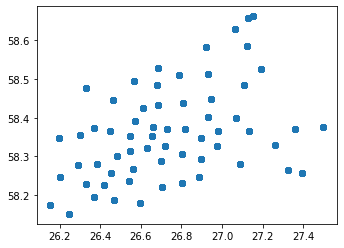

In [93]:
movements_tartu.plot()

In [94]:
movements_tartu.to_file(r'data/movements_tartu.geojson', driver='GeoJSON')

In [95]:
movements_tartu.head()

,KANT_start,KANT_end,start_kant_id,end_kant_id,route_id,Population,RegularMovers,x_origin,y_origin,x_dest,y_dest,geometry
55,Aardla Tartu,Aardla Tartu,2,0,2545,1087,319,26.801733,58.305374,26.801733,58.305374,POINT (26.80173 58.30537)
56,Aardla Tartu,Elva linn,2,1,41507,1087,1,26.801733,58.305374,26.419605,58.226833,POINT (26.80173 58.30537)
59,Aardla Tartu,Haage Tartu,2,2,49130,1087,3,26.801733,58.305374,26.546343,58.352745,POINT (26.80173 58.30537)
60,Aardla Tartu,Ignase Tartu,2,3,78775,1087,1,26.801733,58.305374,26.886680,58.247589,POINT (26.80173 58.30537)
61,Aardla Tartu,Ilmatsalu Tartu,2,4,83010,1087,3,26.801733,58.305374,26.572131,58.391464,POINT (26.80173 58.30537)
